Project - 2 : Insurance

Author : Ragu RAVICHANDRAN

Dataset : Insurance

### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats

from sklearn import linear_model

from scipy.stats import ttest_ind, levene, shapiro

%matplotlib inline
sns.set(color_codes=True)

### Load Data from file

In [2]:
insur = pd.read_csv('insurance.csv')

### Getting top 5 records from loaded data

In [3]:
insur.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Based on the (head) top 5 records from dataset, all 7 columns looks independent variable

### Info on dataset

In [4]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Summarize the data

In [5]:
insur.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


### Shape of dataset

In [6]:
insur.shape

(1338, 7)

Dataframe contains 1338 rowss and 7 columns

In [7]:
insur.isnull().values.any()

False

There are no null values in the given dataset

### Mean, Median & Mode values of each columns in data set

In [8]:
def find_m3(col):
    if insur[col].dtypes == 'int64' or insur[col].dtypes == 'float64':
        print("Mean of {} : {}".format(col,insur[col].mean()), end='; ')
        print("Median of {} : {}".format(col,insur[col].median()), end='; ')
        print("Mode of {} : {}".format(col,insur[col].mode()))
for col in insur.columns:
    find_m3(col)

Mean of age : 39.20702541106129; Median of age : 39.0; Mode of age : 0    18
dtype: int64
Mean of bmi : 30.663396860986538; Median of bmi : 30.4; Mode of bmi : 0    32.3
dtype: float64
Mean of children : 1.0949177877429; Median of children : 1.0; Mode of children : 0    0
dtype: int64
Mean of charges : 13270.422265141257; Median of charges : 9382.033; Mode of charges : 0    1639.5631
dtype: float64


### Value count of categorical variable

In [9]:
column_index=insur.describe(exclude=['int64','float64']).columns
column_index.tolist()

['sex', 'smoker', 'region']

Columns which are non integer/float are chosen to check the value counts on categorical variables as below

In [10]:
for col in column_index.tolist():
    print("Variable name : ", col.upper())
    print(insur[col].value_counts(), '\n')

Variable name :  SEX
male      676
female    662
Name: sex, dtype: int64 

Variable name :  SMOKER
no     1064
yes     274
Name: smoker, dtype: int64 

Variable name :  REGION
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64 



Get the minimum & maximum age from the group by smoker variable.

In [11]:
min_age_smoker=insur[insur['smoker'] == 'yes']['age'].min()
min_age_smoker

18

In [12]:
max_age_smoker=insur[insur['smoker'] == 'yes']['age'].max()
max_age_smoker

64

In [13]:
min_age_nosmoker=insur[insur['smoker'] == 'no']['age'].min()
min_age_nosmoker

18

In [14]:
max_age_nosmoker=insur[insur['smoker'] == 'no']['age'].max()
max_age_nosmoker

64

After identifying the min & max age based on smoker group, get the sum of charges (medical insurance cost) for the same age and smoker category

In [15]:
dict_age={'min_age_smoker':[min_age_smoker,'yes'], 'max_age_smoker':[max_age_smoker,'yes'], 'min_age_nosmoker':[min_age_nosmoker,'no'], 'max_age_nosmoker':[max_age_nosmoker,'no']}
for age_key, age_val in dict_age.items():
    print("Sum of charges for {} with age value {} is {} ".format(age_key, age_val[0], insur[(insur['age'] == age_val[0]) & (insur['smoker'] == age_val[1])]['charges'].sum()))
    

Sum of charges for min_age_smoker with age value 18 is 305684.76265 
Sum of charges for max_age_smoker with age value 64 is 274981.42025 
Sum of charges for min_age_nosmoker with age value 18 is 183264.248739 
Sum of charges for max_age_nosmoker with age value 64 is 237080.25817 


### Plots

#### Histogram plot to find the frequency of occurrence in continuos data set


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEFE1A0F60>,
      dtype=object)

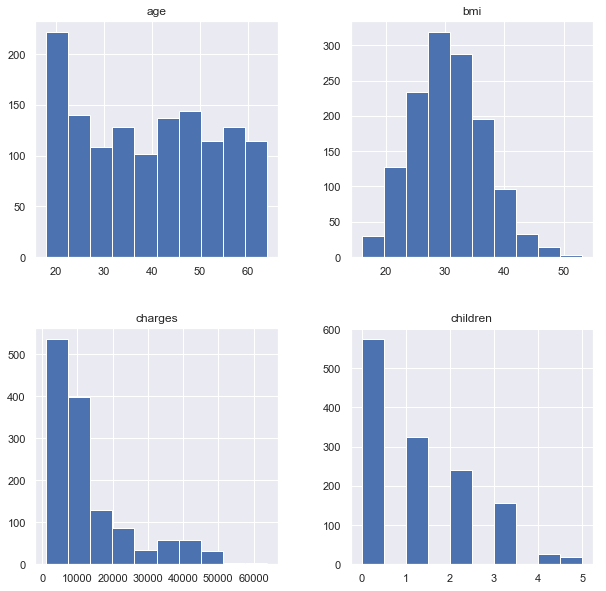

In [10]:
insur.hist(figsize=(10,10))

Frequency of age in dataset is evenly distributed. And for bmi we have more data with the bmi in range around 30.

In [16]:
for sex in ['male','female']:
    print("Sum of Charges for {} sex is : {} ".format(sex, insur[insur['sex'] == sex]['charges'].sum()))

Sum of Charges for male sex is : 9434763.79614 
Sum of Charges for female sex is : 8321061.194619 


Based on the dataset Male gender has little high amount of medical cost insurance.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEF0190C50>,
      dtype=object)

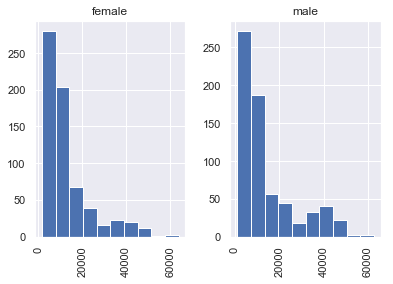

In [17]:
insur.hist(by="sex", column="charges")

As the above point, it is shown in the histogram the frequency of charges group by gender.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEF01902B0>,
      dtype=object)

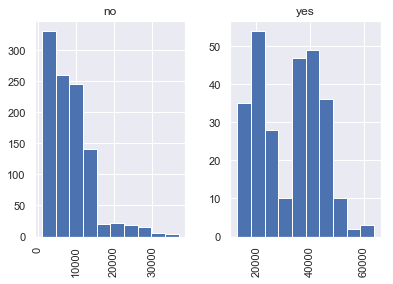

In [18]:
insur.hist(by="smoker",column="charges")

The same has been applied to the smoking and Non-smoking to find the frequncy of charges. So the smoking people has billed high number of medical cost insurance.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEF024D438>,
      dtype=object)

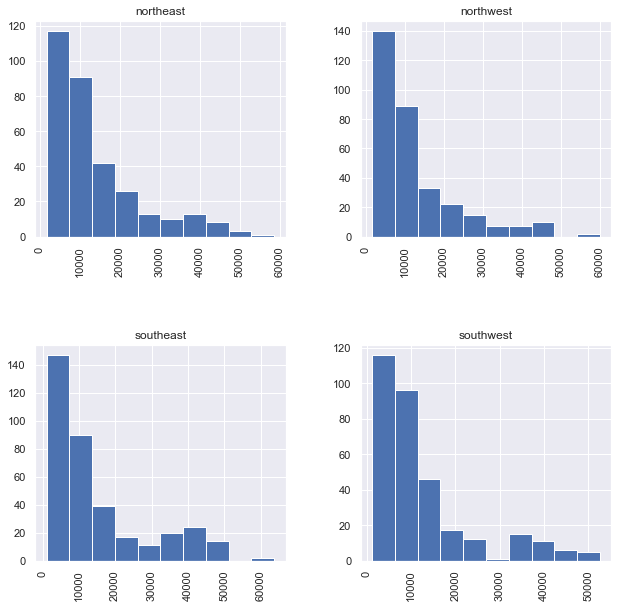

In [19]:
insur.hist(by="region",column="charges",figsize=(10,10))

Based on this plot, with group by region, we have all four region have almost equal sum of medical charges.

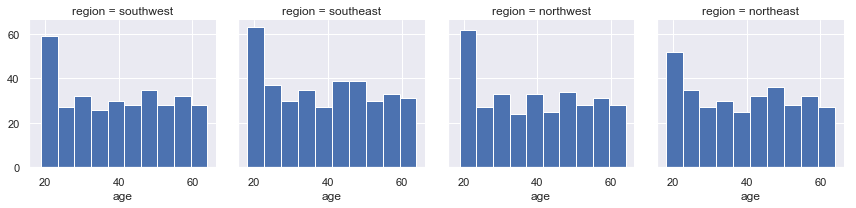

In [20]:
x = sns.FacetGrid(insur, col="region")
x.map(plt.hist, "age")

Also as per the dataset, we have the equal number of age distribution across the all four regions.

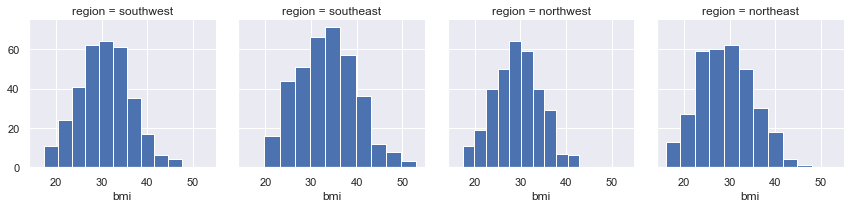

In [21]:
x = sns.FacetGrid(insur, col="region")
x.map(plt.hist, "bmi")

The same plot has been applied in the dataset for bmi variable, where the bmi variable is also have almost similar frequncy across the regions

#### Countplot shows the number of occurrences of each instances of the independent variable.

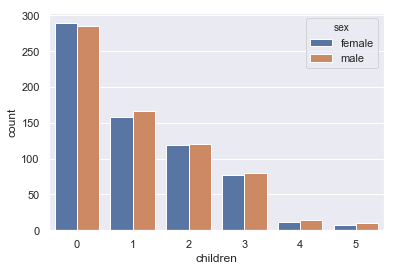

In [22]:
sns.countplot(x="children", hue="sex", data=insur)

As per the given sample, based on gender we have almost equal number of children for both male and female individuals who has applied for medical insurnace.

#### Distplot to identify the distribution of bmi variable within smoking individuals in dataset

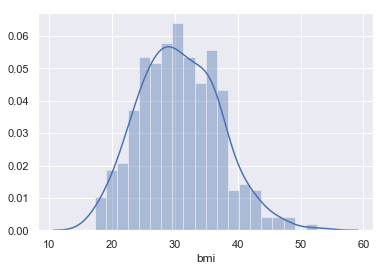

In [23]:
sns.distplot(insur[insur['smoker']=='yes']['bmi'],bins=20)

#### Distplot to identify the univariate distribution of bmi variable within non-smoking individuals in dataset.

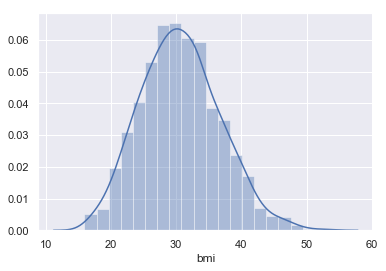

In [24]:
sns.distplot(insur[insur['smoker']=='no']['bmi'],bins=20)

As per the plot distribution, it shows the bmi values in dataset is normally distributed.

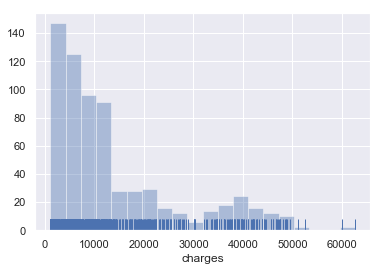

In [25]:
sns.distplot(insur[insur['sex']=='male']['charges'], kde=False, rug=True,bins=20)

Distplot to identify the ditribution of charges variable for gender Male. So based on the distplot more male individuals has medical cost less than or equal to $10000. And there are very low number of individuals who have high medical costs.

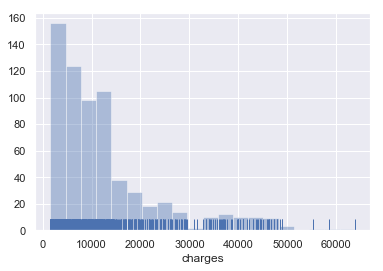

In [26]:
sns.distplot(insur[insur['sex']=='female']['charges'], kde=False, rug=True,bins=20)

The same distplot has been applied to the female gender to identify the charges variable frequency where the same $10000 and values below are higher in range in the sample. 

In [27]:
insur.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


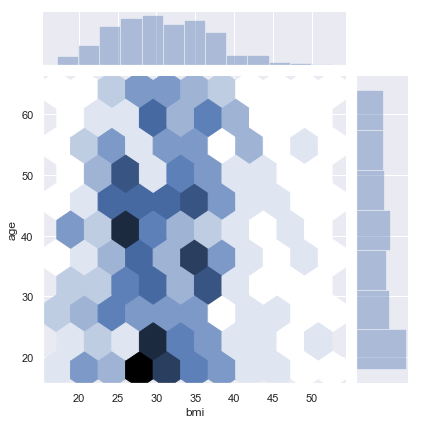

In [29]:
sns.jointplot(insur[insur['smoker']=='yes']['bmi'],insur[insur['smoker']=='yes']['age'],kind='hex')

Since the smoking individuals have high medical costs, we have jointplot between age and bmi variables only for smoking individuals. Where the bmi range lies around 30 across all age groups from the applied filter.

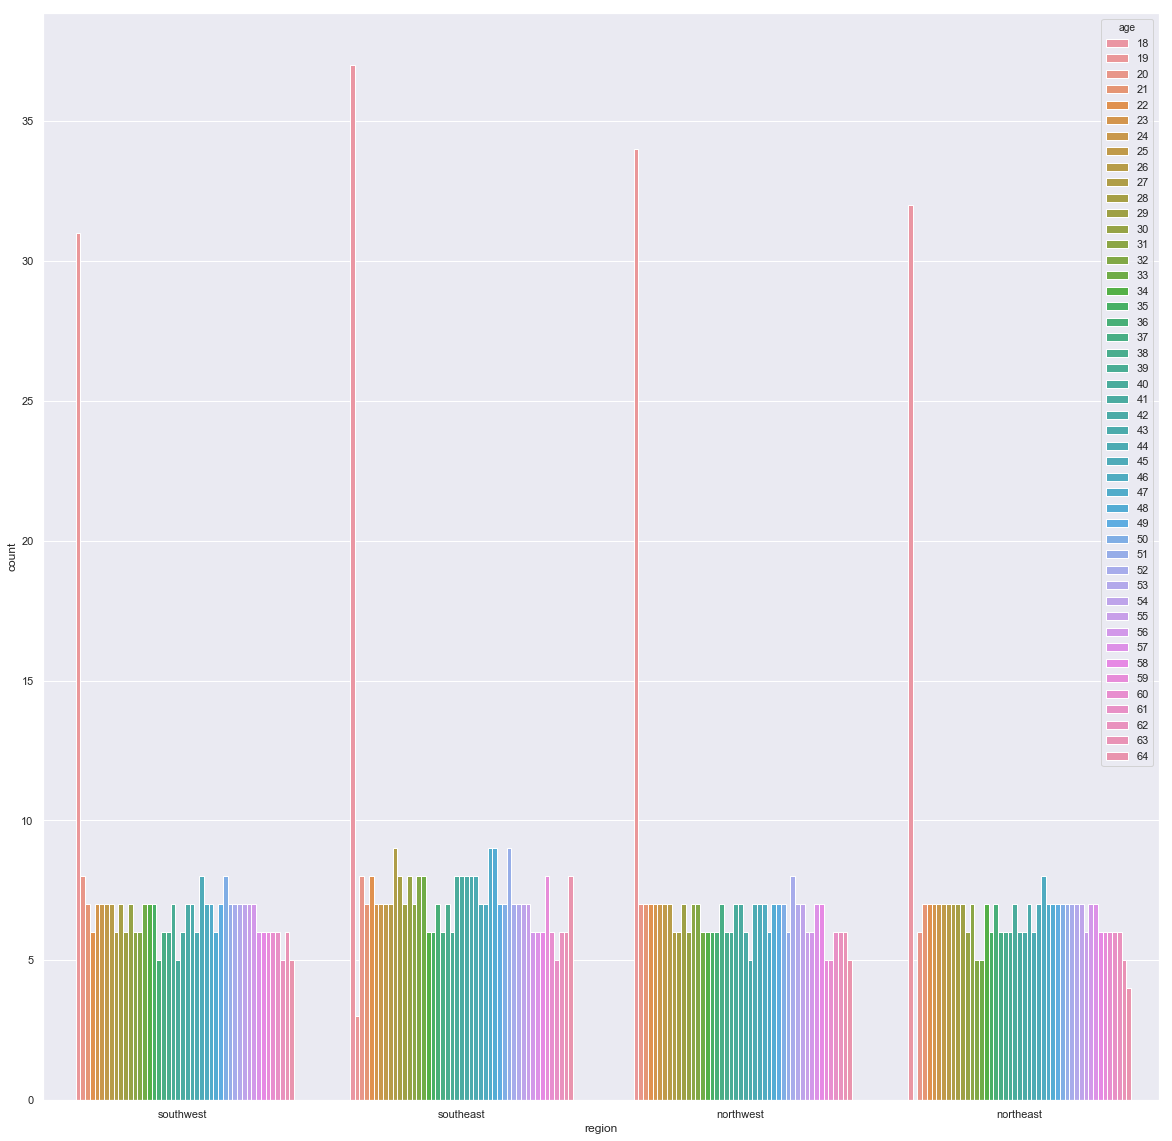

In [41]:
plt.figure(figsize=(20,20))
sns.countplot(x="region", hue="age", data=insur)

To identify the count of particular age groups in all 4 regions, count plot applied between age and region variables. Where in all four regions we have very high count of people in the age limit of 18. And the other age groups are equal in number in all four regions.

#### PairPlot to visualize the relationship between the variables

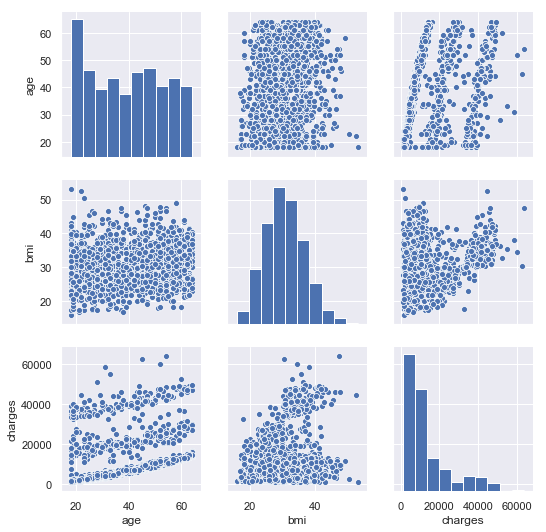

In [17]:
sns.pairplot(insur[['age','bmi','charges']])

Here we are not considering children variable, i guess that wil be categorical in nature according to the dataset. Also the relationship between variables are shown using pair plot. When we relation between age and charges they are increasing when age increases. Same for bmi and charges, less bmi less charges and vice versa.

If diagonal plots are in kind of normal curve then data is correlated.

In [46]:
insur_corr = insur.corr()
insur_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


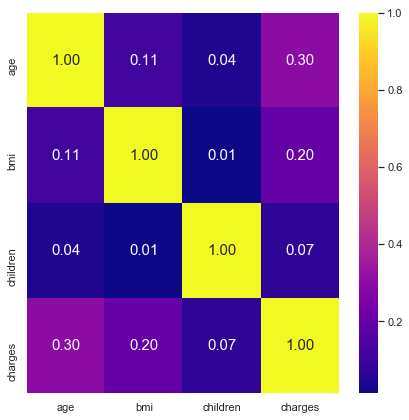

In [50]:
plt.figure(figsize=(7,7))
sns.heatmap(insur_corr,annot=True,annot_kws={'size': 15},cmap='plasma',fmt='.2f')

As we said above, age/charges and bmi/charges are more correlated than other

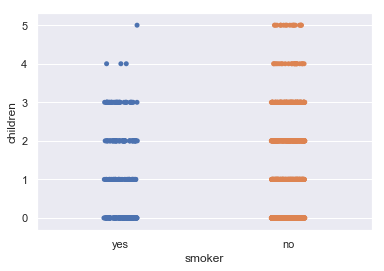

In [51]:
sns.stripplot(insur['smoker'],insur['children'],jitter=True)

Stripplot shows there are very few smoking individuals have 4 or 5 children compared to non-smoking individuals.

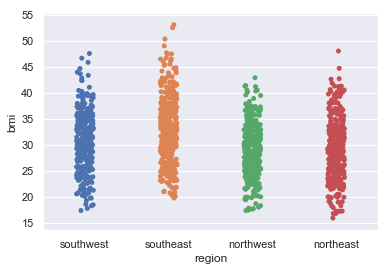

In [52]:
sns.stripplot(insur['region'],insur['bmi'],jitter=True)

South-east region has little high bmi range compared to other three regions in the dataset.

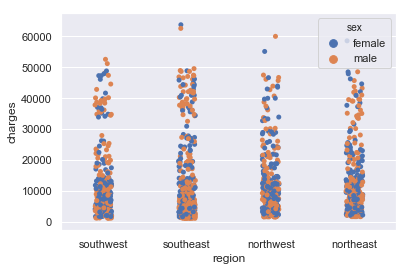

In [20]:
sns.stripplot(insur['region'],insur['charges'],hue=insur['sex'],jitter=True)

Looks gender has been equally spreaded in the dataset across regions and almost 60-70% of the data has less medical charges. And looks there will be outliers in the southeast and northeast region for high charges

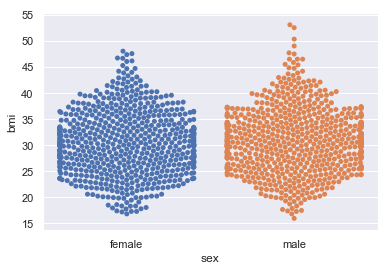

In [54]:
sns.swarmplot(insur['sex'],insur['bmi'])

swarm plot is same as strip plot and just to avoid overlap, looks most of the bmi values in dataset lies between 25-35 and there may be outliers in male bmi values.

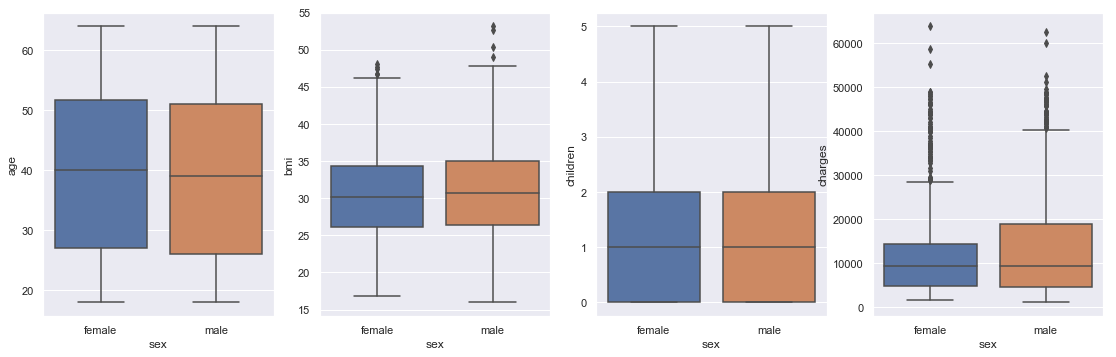

In [65]:
plt.figure(figsize=(19,19))
x_column = 'sex'
y_column = ['age','bmi','children','charges']
for idx, col in enumerate(y_column):
    plt.subplot(3, 4, idx + 1)
    sns.boxplot( insur[x_column], insur[col])

1. Age group between gender is equal. And there is no outliers in the data. Also the mean value is equal to the 50th percentile.
2. There are few outliers in the bmi values for both male and female. Also the same mean is equal to 50th percentile.
3. In children, we have the 25th percentile starting from 0. which also the lower quartile/min value in the variable.
4. Charges variable has more outliers in both the genders. Again mean value is same as the 50th percentile. But the upper limit & 75th percentile in male is high compared to upper limit in female. 

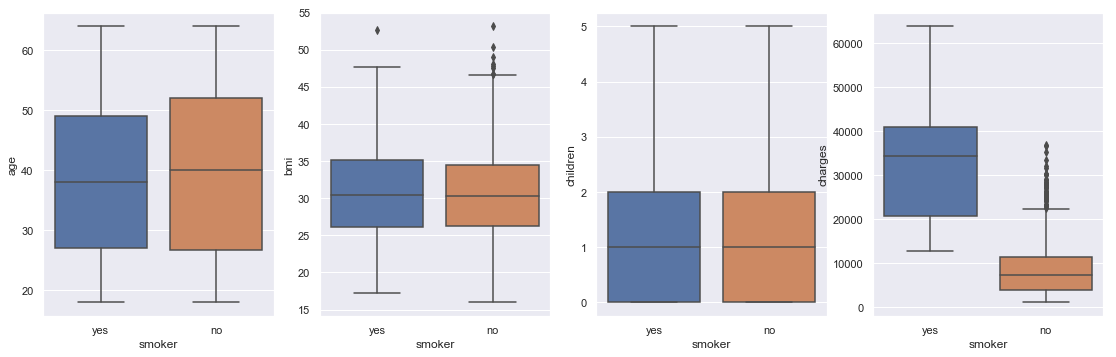

In [72]:
plt.figure(figsize=(19,19))
x_column = 'smoker'
y_column = ['age','bmi','children','charges']
for idx, col in enumerate(y_column):
    plt.subplot(3, 4, idx + 1)
    sns.boxplot( insur[x_column], insur[col])

1. Age and smoker variable is almost normal.
2. We have outliers in the bmi value for non-smoking group.
4. Charges variable are very high in the smoking group compared to very low charges in non-smoking group. Charges of non-smoking group ends were the charges almost started for the smoking group.

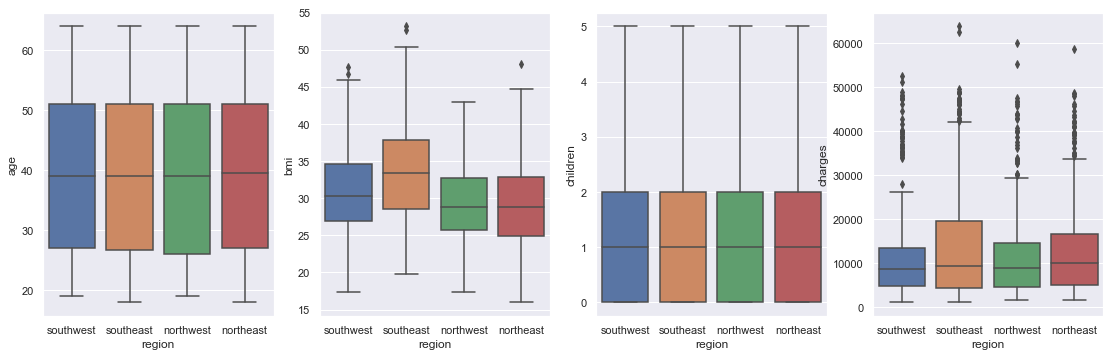

In [71]:
plt.figure(figsize=(19,19))
x_column = 'region'
y_column = ['age','bmi','children','charges']
for idx, col in enumerate(y_column):b
    plt.subplot(3, 4, idx + 1)
    sns.boxplot( insur[x_column], insur[col])

There are more outliers in the charges in all regions. Still southeast has comparatively little high charges than other regions. And southwest has the lowest charges among all regions.

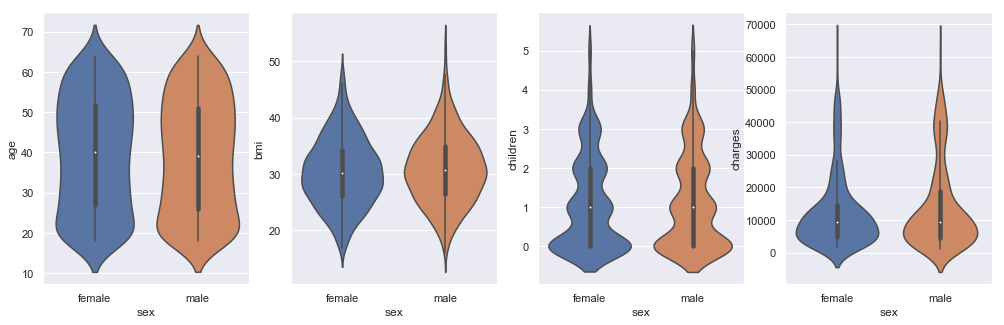

In [78]:
plt.figure(figsize=(17,17))
x=insur['sex']
y=['age','bmi','children','charges']

for idx, y_col in enumerate(y):
    plt.subplot(3, 4, idx+1)
    sns.violinplot(x, y_col, data=insur)

1. Age is equally distributed acros grnder
2. bmi is densely populated at the range of 30 for both genders
3. There are little high density were there are no children for the individuals in the data set
4. Charges in the dataset has more density around the value 10000 and below

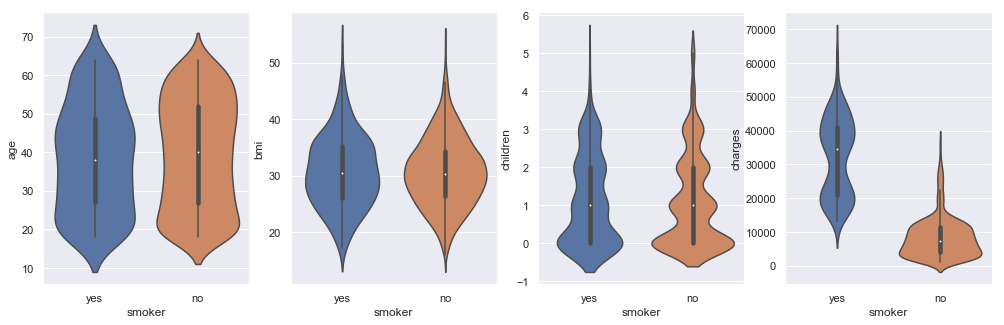

In [79]:
plt.figure(figsize=(17,17))
x=insur['smoker']
y=['age','bmi','children','charges']

for idx, y_col in enumerate(y):
    plt.subplot(3, 4, idx+1)
    sns.violinplot(x, y_col, data=insur)

One main observation is, for non-smoking people it is very clear that there is low medical charges billed. 

<Figure size 360x360 with 0 Axes>

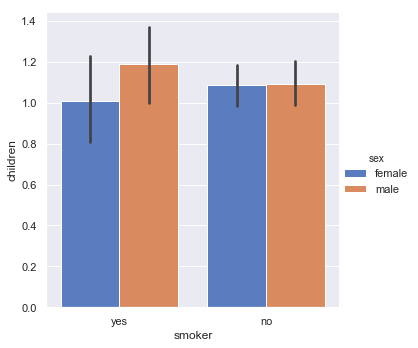

In [112]:
plt.figure(figsize=(5,5))
sns.catplot(x="smoker", y="children", hue="sex", data=insur,height=5, kind="bar", palette="muted")

### Statistics

#### Linear Regression

In [131]:
insur['nSmoker'] = insur['smoker'].apply( lambda x: 1 if x== 'yes' else 0 )

In [133]:
X = insur[['age','bmi','nSmoker','children']]
y = insur[['charges']]

In [134]:
X.head(2)

,age,bmi,nSmoker,children
0,19,27.90,1,0
1,18,33.77,0,1


In [135]:
y.head(2)

,charges
0,16884.9240
1,1725.5523


In [136]:
insur_ln_regr =  linear_model.LinearRegression()

In [137]:
insur_ln_regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
print("Intercept: " , insur_ln_regr.intercept_)
print("Coeff.: "    , insur_ln_regr.coef_)

Intercept:  [-12102.76936273]
Coeff.:  [[  257.84950728   321.85140247 23811.3998446    473.50231561]]


In [140]:
insur_ln_regr.predict([[30,26,1,1]])

array([[28285.75447988]])

#### Normal Deviate Z-Test on bmi variable

In [89]:
insur.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [90]:
Mu = insur['bmi'].mean()
Mu

30.663396860986538

In [92]:
Std = insur['bmi'].std()
Std

6.098186911679017

In [97]:
sample_avg_bmi = np.average(insur['bmi'])
std_error_bmi = Std / np.sqrt(insur.size)

In [98]:
print("Sample Avg BMI: " , sample_avg_bmi)
print("Standard Error: " , std_error_bmi)

Sample Avg BMI:  30.66339686098655
Standard Error:  0.0630120566523161


In [99]:
Z_norm_deviate = (sample_avg_bmi - Mu) / std_error_bmi
print("Normal Deviate Z value :" , Z_norm_deviate)

Normal Deviate Z value : 1.6914447175102237e-13


In [103]:
p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 
print('p values' , p_value)

p values 0.999999999999865


In [104]:
if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Samples are likely drawn from the same distributions (fail to reject H0)


### Hypothesis

1. H0 = Means are same
2. Ha = Means are not same

#### T-test

In [51]:
insur_male=insur[(insur['smoker'] == 'yes') & (insur['sex'] == 'male')]['charges']
insur_female=insur[(insur['smoker'] == 'yes') & (insur['sex'] == 'female')]['charges']


In [52]:
t,p = ttest_ind(insur_male,insur_female)
print(t,p)

1.6780825715285819 0.09447953030991117


1. Here P value = 0.094 is greater than 0.05 , so we accept null hypothesis. Meaning means are same.

#### F test/ Anova

In [53]:
f,p=stats.f_oneway(insur_male,insur_female)

print("F Value= ",f)

print("P-Value= ",p)

F Value=  2.81596111686795
P-Value=  0.0944795303099132


1. P value same as above, which denotes same null hypothesis

#### ANOVA

In [66]:
insur_uchild = insur['children'].unique()
insur_uchild

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [68]:
insur_0_c=insur[insur['children'] == 0]['charges']
insur_1_c=insur[insur['children'] == 1]['charges']
insur_2_c=insur[insur['children'] == 2]['charges']
insur_3_c=insur[insur['children'] == 3]['charges']
insur_4_c=insur[insur['children'] == 4]['charges']
insur_5_c=insur[insur['children'] == 5]['charges']

In [69]:
f,p=stats.f_oneway(insur_0_c, insur_1_c, insur_2_c, insur_3_c, insur_4_c, insur_5_c)

print("F Value= ",f)

print("P-Value= ",p)

F Value=  3.296920166720224
P-Value=  0.005785681380875582


1. Here P value less than 0.05 which means it fails to accept null hypothesis

#### CHI Square test

1. H0 = Two categorical variable are independent
2. Ha = Two categorical variable are dependent

In [70]:
from scipy.stats import chisquare,chi2_contingency

In [83]:
chisquare(insur['smoker'].value_counts())

Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)

In [87]:
chi = pd.crosstab(insur['sex'],insur['smoker'])
chi

smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
chi2_contingency(chi)

1. Looks we cannot conduct chi-square test, since the total count of both male and female are not same.
2. Female count : 662 and Male count : 676

In [93]:
col_values=['bmi','age','charges']
for col in col_values:
    print ("Skewness on Column {} is {} ".format(col, insur[col].skew()))

Skewness on Column bmi is 0.2840471105987448 
Skewness on Column age is 0.05567251565299186 
Skewness on Column charges is 1.5158796580240388 


We can see the same in histogram, how the skew is on the selected variable

#### Measuring skewness on the selected variable

(array([0.00603216, 0.02553613, 0.04705082, 0.06414193, 0.0579087 ,
        0.03920902, 0.0193029 , 0.0064343 , 0.00281501, 0.00060322]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

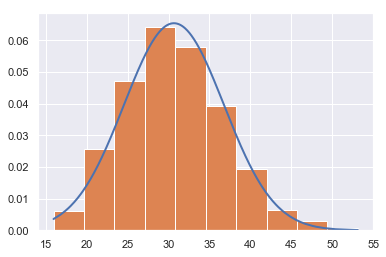

In [100]:
h = np.asarray(insur['bmi'])
h = sorted(h)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,density=True)

(array([0.03606941, 0.02274647, 0.01770975, 0.02079678, 0.01657243,
        0.02225905, 0.02339637, 0.01852213, 0.02079678, 0.01852213]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

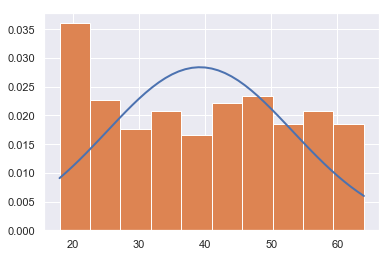

In [101]:
h = np.asarray(insur['age'])
h = sorted(h)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,density=True)

(array([6.39436796e-05, 4.74805681e-05, 1.53894304e-05, 1.02596202e-05,
        4.17542684e-06, 7.03857668e-06, 6.79998086e-06, 3.81753311e-06,
        2.38595820e-07, 4.77191639e-07]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

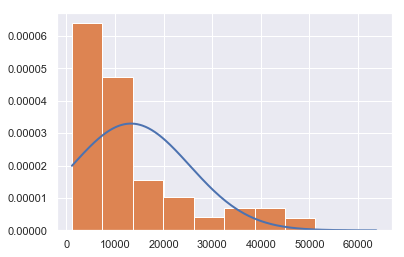

In [102]:
h = np.asarray(insur['charges'])
h = sorted(h)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,density=True)

So as per the skew() on dataframe of particular variable, histogram also shows the same and skew is on right side of all 3 variables bmi, age, charges. And for age , it is not totally on right side its normal but the skew value is +ve.

## Questions

#### 1. Do charges of people who smoke differ significantly from the people who don't? 

1. H0 = There is no significant difference in charges between smoker and non-smoker
2. Ha = There is significant difference in charges between smoker and non-smoker

In [108]:
insur_smoker = insur[insur['smoker'] == 'yes']['charges']
insur_nosmoker = insur[insur['smoker'] == 'no']['charges']
t,p = ttest_ind(insur_smoker,insur_nosmoker)
print(t,p)

if p > 0.05:
    print("We accept null hypothesis (H0), there is no significant difference in charges")
else:
    print("We fail to accept null hypothesis (Ha), there is significant difference in charges")

46.664921172723716 8.271435842177219e-283
We fail to accept null hypothesis (Ha), there is significant difference in charges


#### 2. Does bmi of males differ significantly from that of females? 

1. H0 = There is no significant difference in bmi values between male and female
2. Ha = There is significant difference in bmi values between male and female

In [109]:
insur_Mbmi = insur[insur['sex'] == 'male']['bmi']
insur_Fbmi = insur[insur['sex'] == 'female']['bmi']
t,p = ttest_ind(insur_Mbmi,insur_Fbmi)
print(t,p)

if p > 0.05:
    print("We accept null hypothesis (H0), there is no significant difference in bmi")
else:
    print("We fail to accept null hypothesis (Ha), there is significant difference in bmi")

1.696752635752224 0.08997637178984932
We accept null hypothesis (H0), there is no significant difference in bmi


#### 3. Is the proportion of smokers significantly different in different genders? 

1. H0 = Proportion of smokers is not different in different genders
2. Ha = Proportion of smokers is different in different genders


In [130]:
insur_mod = pd.read_excel("insurance.xlsx",sheet_name=0)


In [131]:
chisquare(insur_mod['smoker'].value_counts())

Power_divergenceResult(statistic=457.1631419939577, pvalue=1.9917951522012183e-101)

In [132]:
chi = pd.crosstab(insur_mod['sex'],insur_mod['smoker'])
chi

smoker,no,yes
sex,,
female,547,115
male,504,158


In [133]:
chi2_contingency(chi)

(8.139939983898119, 0.004330071693942131, 1, array([[525.5, 136.5],
        [525.5, 136.5]]))

#### test_statistic - 8.139939983898119
#### P value - 0.004330071693942131
#### degrees of freedom - 1

Here we have formatted/cleaned the data, by deleting the random 14 rows from male individual to match the column count.

#### 4. Is the distribution of bmi across women with no children, one child and two children, the same ? 

1. H0 = Distribution of bmi across women to different children counts are same
2. Ha = Distribution of bmi across women to different children counts are different

In [89]:
insur_uchild = insur[insur['sex']=='female']['children'].unique()
insur_uchild

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [90]:
insur_0_cbmi=insur[insur['children'] == 0]['bmi']
insur_1_cbmi=insur[insur['children'] == 1]['bmi']
insur_2_cbmi=insur[insur['children'] == 2]['bmi']
insur_3_cbmi=insur[insur['children'] == 3]['bmi']
insur_4_cbmi=insur[insur['children'] == 4]['bmi']
insur_5_cbmi=insur[insur['children'] == 5]['bmi']

In [110]:
f,p=stats.f_oneway(insur_0_cbmi, insur_1_cbmi, insur_2_cbmi, insur_3_cbmi, insur_4_cbmi, insur_5_cbmi)

print("F Value= ",f)

print("P-Value= ",p)

if p > 0.05:
    print("We accept null hypothesis (H0), there is no difference in bmi for women with different children counts")
else:
    print("We fail to accept null hypothesis (Ha), there is significant difference in bmi for women with different children counts")


F Value=  0.3493265600634915
P-Value=  0.8828680638670884
We accept null hypothesis (H0), there is no difference in bmi for women with different children counts


### Conclusion

1. We have EDA which shows the smoking individuals have medical cost insurance than the non-smoking individuals
2. BMI ratio is common/almost equal across gender
3. Southeast region has relatively little BMI compared to other regions
4. Southeast region has relatively high value of ouliers, other do have but comparatively little lower than southeast
5. Non-smoking people have more ouliers in charges variable in the given dataset
6. Male individuals have comparatively high medical charges than female, because it has high values greater from the 50th percentile. 
7. Age and bmi are more correlated with charges variable as per heat map. It shows that when age increase medical charges also increases.